`pip install prophet`


`New-ItemProperty -Path "HKLM:\SYSTEM\CurrentControlSet\Control\FileSystem" -Name "LongPathsEnabled" -Value 1 -PropertyType DWORD -Force`

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from aeon.utils.plotting import plot_series
from aeon.datasets import load_airline
from aeon.forecasting.naive import NaiveForecaster
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.forecasting.base import ForecastingHorizon
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error
from aeon.forecasting.bats import BATS

In [2]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
# we will try to forecast y_test from y_train

fh = np.arange(1, len(y_test) + 1)

In [3]:
from aeon.forecasting.fbprophet import Prophet

# Convert index to pd.DatetimeIndex
# z = y.copy()
# z = z.to_timestamp(freq="M")
# z_train, z_test = temporal_train_test_split(z, test_size=36)

14:43:19 - cmdstanpy - INFO - Chain [1] start processing
14:43:19 - cmdstanpy - INFO - Chain [1] done processing


0.0724158077760295

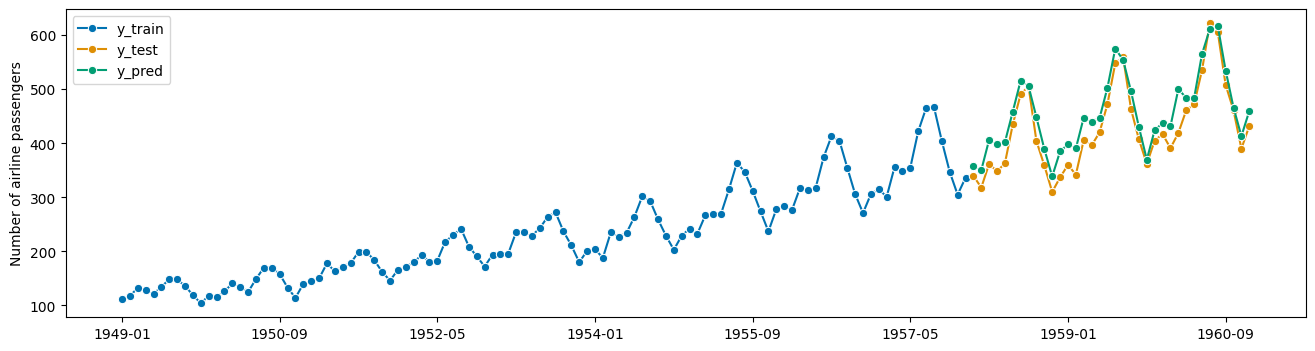

In [4]:
forecaster = Prophet(
    seasonality_mode="multiplicative",
    n_changepoints=int(len(y_train) / 12),
    add_country_holidays={"country_name": "Germany"},
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_pred.index = y_test.index

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)